In [ ]:
#Importing the necessary libraries
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.15.0


In [ ]:
#Loading the cifar10 dataset from tfds
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
#Verifying the size,shape of the input data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Now, the Cifar10 dataset consists of 10 categories numbered from 1 to 10.The 10 categories are as follows:airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Additional information regarding this dataset can be found at the following URL:
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
#This function takes the array of outputs and returns a dictionary consisting of the key value being the category and values being the number of images in each category
def counter(array):
  list=[]
  counter=[]
  j=0
  for i in range(len(array)):
    if array[i] in list:
      pass
    elif array[i] not in list:
      list.append(array[i][0])

  beta=[]
  for k in range(len(list)):
    alpha=0
    for i in range(len(array)):
      if array[i]==list[k]:
        alpha=alpha+1
    beta.append(alpha)

  dictionary={list[i]:beta[i] for i in range(len(list))}
  #above should return a dictionary with keys being the categories and the values being the frequency of each

  return dictionary


In [ ]:
#Calculating number of images per category
print('For training , the number of images per category is as follows:',counter(y_train))
print('For testing , the number of images per category is as follows:',counter(y_test))

For training , the number of images per category is as follows: {6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000}
For testing , the number of images per category is as follows: {3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000}


In [ ]:
#Given that the original data provides training and test sets,a validation set is also prepared
from sklearn.model_selection import train_test_split

#Splitting up the original dataset into training and validaton sets in ratio 90:10
train_x,val_x,train_y,val_y=train_test_split(x_train,y_train, test_size=0.1, random_state=27, shuffle=True)

In [ ]:
#Given that the input images in the RGB channels have pixel values from 0 to 255,normalization is done
#Normalizing the data
train_x=train_x/255.0
val_x=val_x/255.0
x_test=x_test/255.0

#One hot encoding the labels into corresponding vectors
train_y=tf.keras.utils.to_categorical(train_y)
val_y=tf.keras.utils.to_categorical(val_y)

print("train_x.shape", train_x.shape)
print("val_x.shape", val_x.shape)
print("train_y.shape",train_y.shape)
print("val_y.shape", val_y.shape)

train_x.shape (45000, 32, 32, 3)
val_x.shape (5000, 32, 32, 3)
train_y.shape (45000, 10)
val_y.shape (5000, 10)


In [ ]:
#Setting up the Augmentation for the images in the training dataset
#The above is done to reduce overfitting to the existing data and also to increase model's capability to recognize variations in inputs

#Instantiate instances of the ImageDataGenerator class for the training and validation sets
train_datagen = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator()

In [ ]:
#Defining the parameters for the generators
train_generator=train_datagen.flow((train_x,train_y),
                                   batch_size=50,
                                   seed=27,
                                   shuffle=True)

val_generator=val_datagen.flow((val_x,val_y),
                                   batch_size=50,
                                   seed=27,
                                   shuffle=True)

In [ ]:
#Defining the model using TensorFlow Sequential API,Convolution layers,Batch Normalization,Dropout

model=tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32,(2,2), padding="same",strides=(1,1),input_shape=(32,32,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),padding="same",strides=(1,1),activation='relu'),#2,2 changed to 3,3kernel
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(5,5),padding="same",strides=(1,1),activation='relu'),#2,2 changed to 5,5 kernel
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(2,2),padding="same",strides=(1,1),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 1024)      132096    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 1024)      4096      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 1024)      0         
 D)                                                              
                                                        

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

In [ ]:
#Conduction of the training
output_history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=30,
      verbose=1,
      validation_data=val_generator,
      validation_steps=val_generator.n//val_generator.batch_size,
      )

Epoch 1/30
900/900 [==============================] - 54s 49ms/step - loss: 1.5145 - accuracy: 0.4563 - val_loss: 1.1824 - val_accuracy: 0.6014
Epoch 2/30
900/900 [==============================] - 44s 49ms/step - loss: 1.0569 - accuracy: 0.6282 - val_loss: 0.9177 - val_accuracy: 0.6838
Epoch 3/30
900/900 [==============================] - 45s 50ms/step - loss: 0.8930 - accuracy: 0.6889 - val_loss: 0.8034 - val_accuracy: 0.7160
Epoch 4/30
900/900 [==============================] - 45s 50ms/step - loss: 0.7873 - accuracy: 0.7298 - val_loss: 0.7336 - val_accuracy: 0.7560
Epoch 5/30
900/900 [==============================] - 45s 50ms/step - loss: 0.7172 - accuracy: 0.7554 - val_loss: 0.7608 - val_accuracy: 0.7452
Epoch 6/30
900/900 [==============================] - 46s 51ms/step - loss: 0.6566 - accuracy: 0.7760 - val_loss: 0.6111 - val_accuracy: 0.7974
Epoch 7/30
900/900 [==============================] - 45s 50ms/step - loss: 0.6131 - accuracy: 0.7933 - val_loss: 0.6047 - val_accuracy:

In [ ]:
#Defines a function to plot the training and validation's loss and accuracy

def plotter(variable):
  acc = variable.history['accuracy']
  val_acc = variable.history['val_accuracy']
  loss = variable.history['loss']
  val_loss = variable.history['val_loss']

  epochs = range(len(acc))
  plt.style.use('dark_background')
  plt.plot(epochs, acc, 'r',linewidth=3, label='Training accuracy',marker='o')
  plt.plot(epochs, val_acc, 'g', label='Validation accuracy',linewidth=3,marker='s')
  plt.xlabel('Number of epochs')
  plt.ylabel('Numerical Value')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss',linewidth=3,marker='o')
  plt.plot(epochs, val_loss, 'g', label='Validation Loss',linewidth=3,marker='s')
  plt.xlabel('Number of epochs')
  plt.ylabel('Numerical Value')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

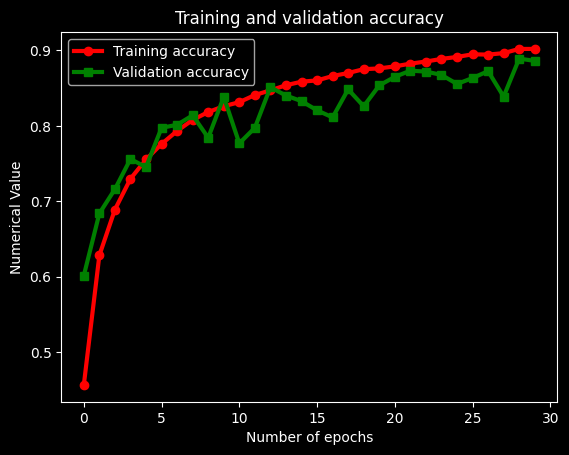

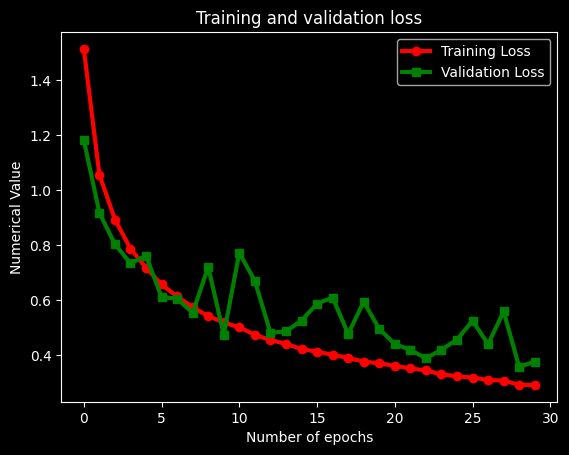

In [ ]:
#Plots the above details based on training outputs
plotter(output_history)

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_test,verbose=1,batch_size=50)
y_hat=np.argmax(prediction,axis=-1)

#Accuracy with the test data
print('Test Data accuracy is : ',accuracy_score(y_test, y_hat)*100)


200/200 [==============================] - 2s 11ms/step
Test Data accuracy is :  86.83


In [ ]:
#creation of a classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1000
           1       0.89      0.96      0.92      1000
           2       0.82      0.84      0.83      1000
           3       0.80      0.71      0.75      1000
           4       0.86      0.83      0.85      1000
           5       0.87      0.77      0.82      1000
           6       0.79      0.96      0.87      1000
           7       0.90      0.91      0.90      1000
           8       0.95      0.91      0.93      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
print(y_hat)
print(y_test)

[3 8 8 ... 5 1 7]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
